# **Ex3**

## Names and IDs

1.   Dan Vaitzman 318940913
2.   Guy Biton 207577875
3.   Ido Dai 207757535

## 1. Fuel efficiency price prediction (35 points)
In this section we will use regression tree model for predicting the fuel efficiency for different cars


The features data available here:
https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv

The labels are here:
https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv


In [89]:
import numpy as np
# load the data
import pandas as pd
y = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv')
X = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv')

### EDA visuallization (5pts)

Explore the data. What features are meaningful? what are the correlated features? display statistcs about the data itself including it's value ranges.

<ipython-input-90-4d5da5ba8047>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_eda.corr()


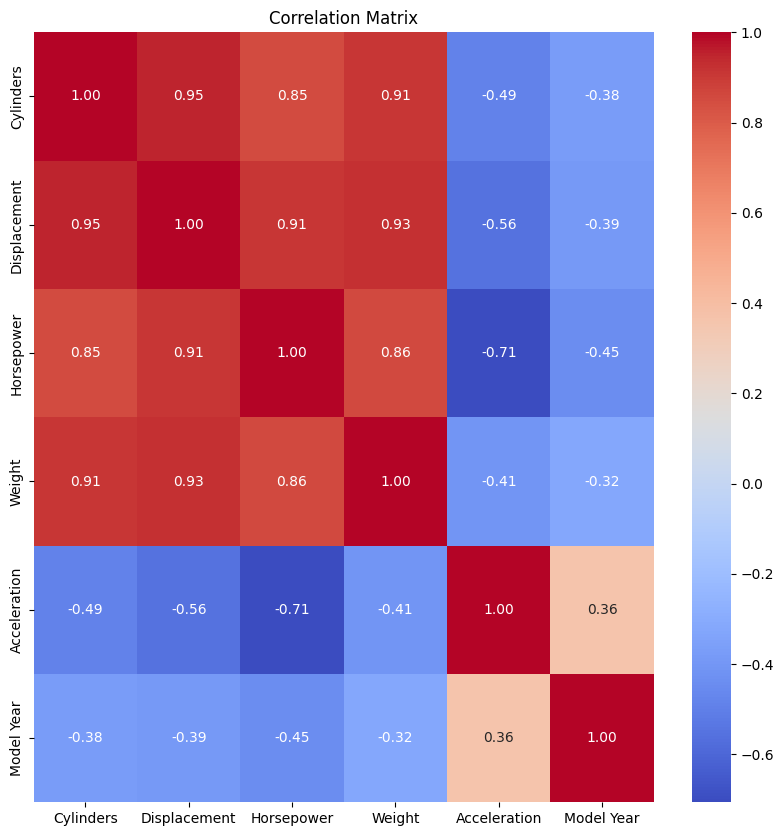



Descriptive Statistics:
        Cylinders  Displacement  Horsepower       Weight  Acceleration  \
count  307.000000    288.000000  284.000000   293.000000    305.000000   
mean     5.527687    199.633681  105.109155  2975.184300     15.618689   
std      1.702089    103.550163   38.472863   842.988873      2.825252   
min      3.000000     68.000000   46.000000  1613.000000      8.000000   
25%      4.000000    105.000000   75.000000  2234.000000     13.700000   
50%      5.000000    156.000000   95.000000  2795.000000     15.500000   
75%      8.000000    302.000000  130.000000  3620.000000     17.500000   
max      8.000000    455.000000  225.000000  4997.000000     24.600000   

       Model Year  
count  311.000000  
mean    76.122186  
std      3.673513  
min     70.000000  
25%     73.000000  
50%     76.000000  
75%     79.000000  
max     82.000000  

 The Correlated Features are :

{('Displacement', 'Cylinders'), ('Horsepower', 'Displacement'), ('Weight', 'Horsepower'), ('We

In [90]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt


# Calculating correlation matrix
data_eda = X.copy()
corr_matrix = data_eda.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Displaying descriptive statistics
print("\n")
print("Descriptive Statistics:")
print(X.describe())
# Set threshold for correlation
correlation_threshold = 0.65

# Find correlated features
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            colname = corr_matrix.columns[i]
            sec_colname =corr_matrix.columns[j]
            correlated_features.add((colname,sec_colname))

print("")
# Print correlated features
print(" The Correlated Features are :\n")
print(correlated_features)


### EDA insights (5pts)

What are you insgits based on the previuse visualization?
 My insgits based on the previuse visualization:
 1. Strong Positive Correlations: "Cylinders", "Displacement", "Horsepower", and "Weight" exhibit strong positive correlations with each other. This suggests that as one of these features increases, the others tend to increase as well.
 2. Negative Correlation: "Acceleration" has a moderate negative correlation with "Cylinders", "Displacement", "Horsepower", and "Weight". This implies that as these features increase, acceleration tends to decrease.
 3. Weak Correlation with Model Year: "Model Year" has weak negative correlations with "Cylinders", "Displacement", "Horsepower", and "Weight", indicating that newer model years tend to have slightly fewer cylinders, lower displacement, lower horsepower, and lighter weight.


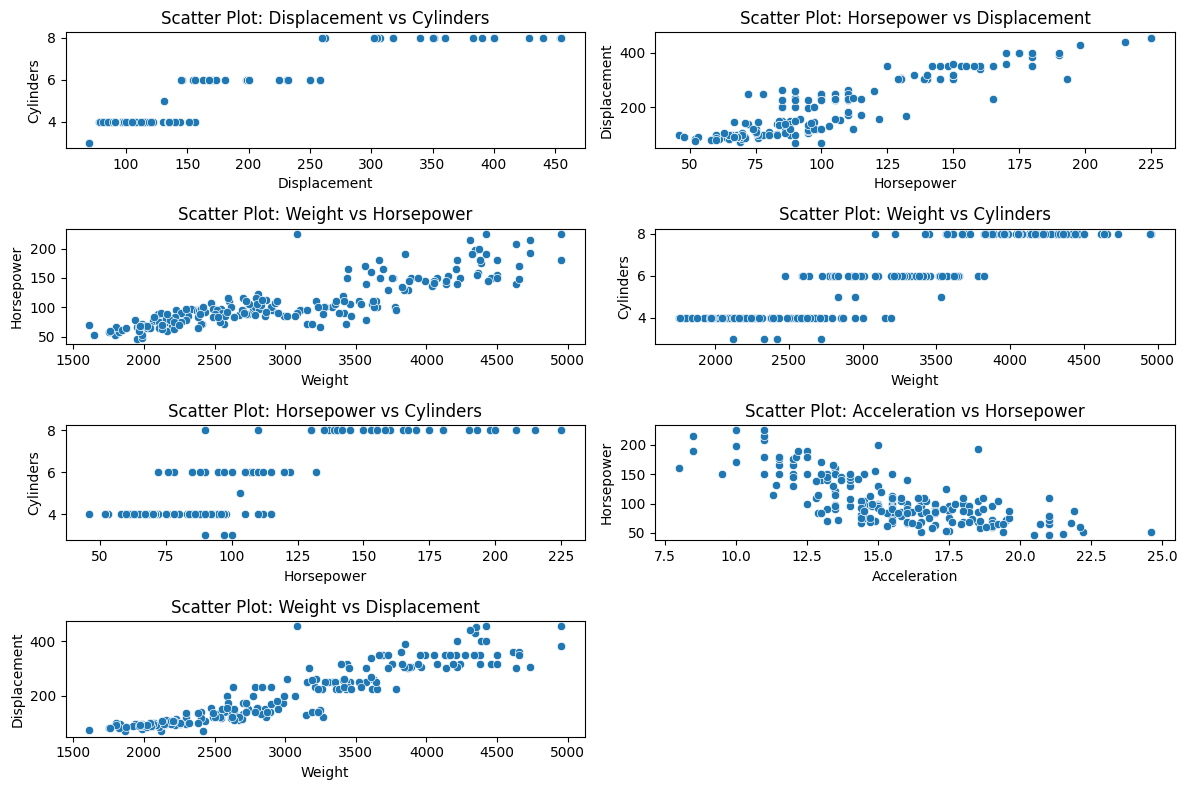

In [91]:
# Graph 2 -

num_plots = len(correlated_features)
num_rows = num_plots // 2 + num_plots % 2  # Calculate number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 8))
# Flatten axes for easier iteration
axes = axes.flatten()
# Iterate through correlated feature pairs and plot scatter plots
for i, pair in enumerate(correlated_features):
    sns.scatterplot(data=X, x=pair[0], y=pair[1], ax=axes[i])
    axes[i].set_title(f'Scatter Plot: {pair[0]} vs {pair[1]}')
# Remove empty subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])
# Adjust layout
plt.tight_layout()
plt.show()


### Preprocessing (5pts)

Apply preprocessing according to your data, handle missing values and split the dataset into train-test as well.
Explain the reason for all methods that you apply.

Make sure that it doesn't affect the data charateristics. Which means that the correlations stay the same (if it was not corelated before it shouldn't be now).

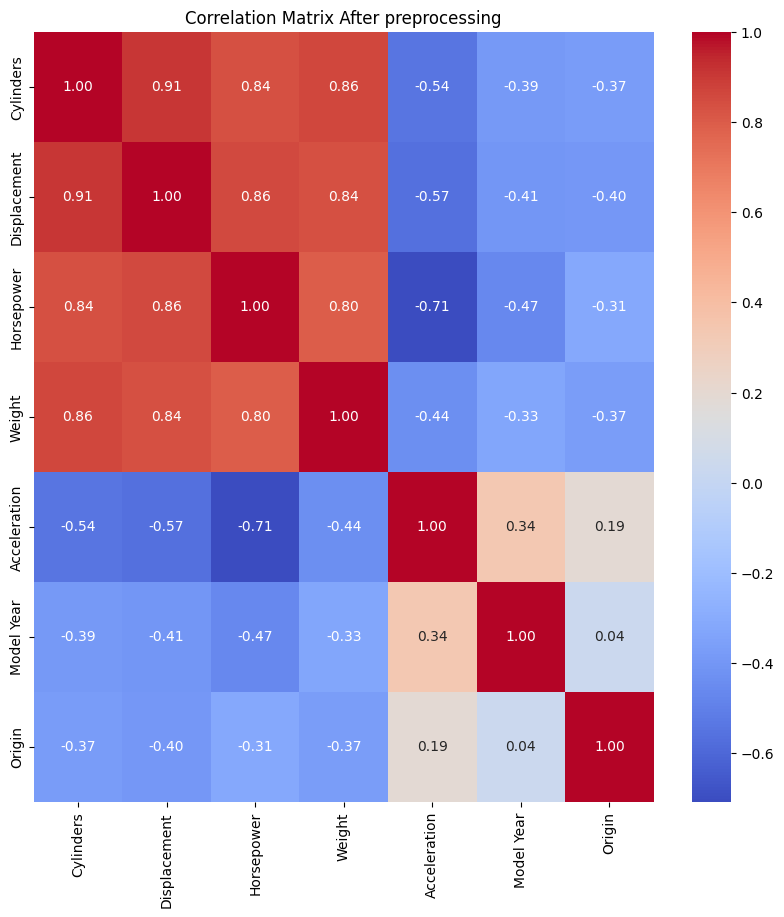


 The Correlated Features are :

{('Displacement', 'Cylinders'), ('Horsepower', 'Displacement'), ('Weight', 'Horsepower'), ('Weight', 'Cylinders'), ('Horsepower', 'Cylinders'), ('Acceleration', 'Horsepower'), ('Weight', 'Displacement')}


In [92]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

data = X.copy()

# Apply preprocessing
data['Origin'] = data['Origin'].replace({'USA': 1, 'Japan': 2, 'Europe': 3, np.nan: 0})
missing_values = data.isnull().sum()
# Filter columns with missing values
col_with_miss_values = missing_values[missing_values > 0].index.tolist()
col_with_miss_values = data.columns[data.isnull().any()]
imputer = KNNImputer(n_neighbors = 5)
data[col_with_miss_values] = imputer.fit_transform(data[col_with_miss_values])


corr_matrix_new=data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix_new, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix After preprocessing')
plt.show()

correlation_threshold = 0.65
correlated_features_new = set()
for i in range(len(corr_matrix_new.columns)):
    for j in range(i):
        if abs(corr_matrix_new.iloc[i, j]) > correlation_threshold:
            colname = corr_matrix_new.columns[i]
            sec_colname =corr_matrix_new.columns[j]
            correlated_features_new.add((colname,sec_colname))

print("")
print(" The Correlated Features are :\n")
print(correlated_features_new)

### Model training and evaluation (10 pts)


Split the data into train-test with 80-20% ratio.
Train the regression tree model on the training set and check it's performance on the test set using two evaluation metrics.
Compare the results and write your conclusion

In [93]:
# Model training
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into train and test sets with 80-20% ratio
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

# Train the regression tree model on the training set
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [94]:
# Evaluation
# Evaluate the model performance on the test set using Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
R_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", R_squared)

Mean Squared Error (MSE): 17.009750000000004
R-squared (R2): 0.6836363200978863


### Explainability (10 pts)

1. Use the SHAP tool for explaining how each feature contributes to the model (i,e, explain the training set)
2. Choose 3 different cars  explain thier spesific predictions results (i,e, what was important for this spesific cars)


In [95]:
!pip install shap
import shap

2. Choose 3 different cars  explain thier spesific predictions results (i,e, what was important for this spesific cars)

**Answers : **

**For Car 1**, the prediction of 16.0 MPG might be influenced by its high weight and moderate displacement and horsepower, which could contribute to lower fuel efficiency. Additionally, the model year of 1970 might also have an impact.

**Car 2** has a prediction of 27.0 MPG, likely due to its lower weight, smaller displacement, and moderate horsepower compared to Car 1. The model year and origin (Europe) may also contribute positively to the prediction.

**Car 3** has the highest predicted fuel efficiency of 37.0 MPG, likely attributed to its low weight, smaller engine size, and moderate horsepower. Additionally, the model year of 1982 and origin (Europe) might contribute positively to the prediction.


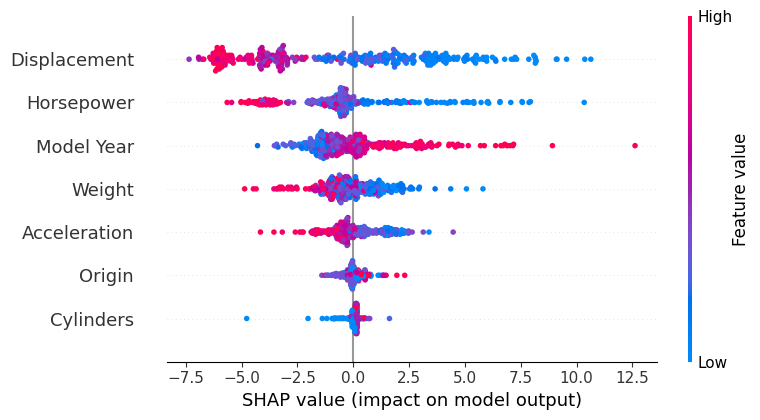

     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
3          8.0         304.0       172.6  3701.0         14.36        70.0   
18         4.8          97.0        88.0  2130.0         14.50        70.0   
376        4.0          91.0        68.0  2025.0         18.20        82.0   

     Origin  
3       0.0  
18      2.0  
376     2.0  

Prediction for Car 1: 16.0
Prediction for Car 2: 27.0
Prediction for Car 3: 37.0


In [96]:
# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="dot")

cars_to_explain = X_train.iloc[:3]

print(cars_to_explain)
predictions = model.predict(cars_to_explain)
print("")
# Display the predictions for each car
for i, prediction in enumerate(predictions):
    print(f"Prediction for Car {i+1}: {prediction}")



## 2. Classification evaluation (15 points)

Submit question 2 as a PDF file with the calculations, graphs and explainations.

### ROC and precision recall curve (8 pts)



Calculate ROC curve and precision recall curve with the follwing tresholds: [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
The probabilities are:

| label | classifier 1 | classifier 2|
|--------|----------|---------------|
|1|0.41|1.00|
|0	|0.00	|0.72
|0	|0.00	|0.99
|1	|0.73	|0.14
|0	|0.62	|0.00
|1	|1.00	|0.94
|0	|1.00	|0.10
|1	|0.14	|0.77
|0	|0.00	|0.02
|1	|0.55	|1.00






Answer the following questions:
1. Which model is better based on those graphs?
2. If those models predict heart attack, choose a 'one threshold' metric (such as acc, precision, etc..) and explain why it's a suitable metric for this case.

### Curves differences (7 pts)

Create a new table with two columns: 'label' and 'predictions'. Fill the table with 10 rows of values representing binary labels and corresponding predicted probabilities.
Ensure that the values chosen for the predictions are deliberately selected to make the ROC curve and precision-recall curve look different - which means that according to one curve the model is good, and according to the second one it's bad.
After filling the table, draw both the ROC curve and precision-recall curve using the provided data.
Explain the values that you chose and the reason for the change.

## 3. Ensembel (40 pts)

 implement adaBoost (25 pts)
implement the adaboost algorithm from scratch, refer to the lecture slides for the algorithm 43.
you may add any helper functions if needed but make sure to add documentation if you do so.
note, the base_estimator in sklearn supports sample_weight, you may use it if you want to.

In [117]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from copy import deepcopy


class AdaBoost:
    def __init__(self, n_estimators=50, base_estimator=None):
      self.n_estimators =n_estimators
      self.base_estimator = base_estimator if base_estimator else DecisionTreeClassifier(max_depth=1)
      self.estimators = []
      self.alphas = []

    def fit(self, X, y):
        # implement the algorithm 43 from the lecture.
        # make sure the base_estimators are not same object (i.e. use deep copy or any other method to make sure they are different objects)
        n_samples = X.shape[0]
        weights = np.full(n_samples,(1/n_samples))  # Initialize sample weights
        for _ in range(self.n_estimators):
          # Train base estimator with weighted samples
          model = deepcopy(self.base_estimator)
          # base_estimator = self.base_estimator.fit(X, y, sample_weight=weights)
          model.fit(X,y, sample_weight=weights)
          # Predict on training data
          y_pred = model.predict(X)
          # Calculate weighted error
          # error = np.sum(weights * (y_pred != y))
          error = np.sum(weights[y != y_pred])

          # Calculate alpha (classifier weight)
          alpha = 0.5 * np.log((1 - error) / error + 1e-10)  # Add small value to prevent division by zero

          # Update sample weights
          weights *= np.exp(-alpha * y * y_pred)
          weights /= np.sum(weights)  # Normalize weights to sum up to 1

          # Save the trained estimator and its weight
          self.estimators.append(model)
          self.alphas.append(alpha)
    def predict(self, X):
        probs = np.zeros(X.shape[0])
        # Predict class probabilities for each estimator and combine using weighted voting
        for estimator, alpha in zip(self.estimators, self.alphas):
             probs += alpha * estimator.predict(X)
        # Return class labels based on sign of weighted sum of probabilities
        return np.sign(probs)
    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)


### Model training
train the adaboost model using the synthetic data below, use the following base estimators n_estimators=3,5,10:
1. DecisionTreeClassifier with max_depth=1
2. DecisionTreeClassifier with max_depth=3
3. svm.SVC with kernel='linear'


In [118]:
data = X.copy()

# Apply preprocessing
data['Origin'] = data['Origin'].replace({'USA': 1, 'Japan': 2, 'Europe': 3, np.nan: 0})
missing_values = data.isnull().sum()
# Filter columns with missing values
col_with_miss_values = missing_values[missing_values > 0].index.tolist()
col_with_miss_values = data.columns[data.isnull().any()]
imputer = KNNImputer(n_neighbors = 5)
data[col_with_miss_values] = imputer.fit_transform(data[col_with_miss_values])

data, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
y[y==0]=-1
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

base_estimators = []
base_estimators.append(DecisionTreeClassifier(max_depth=1))
base_estimators.append(DecisionTreeClassifier(max_depth=3))
base_estimators.append(SVC(kernel='linear'))

n_estimators_values = [3, 5, 10]
results = []
for base_estimator in base_estimators:
    for n_estimators in n_estimators_values:
        # Initialize AdaBoost with current base estimator and n_estimators
        ada_boost = AdaBoost(n_estimators=n_estimators, base_estimator=base_estimator)
        # Train the model
        ada_boost.fit(X_train, y_train)

        # Make predictions on training data
        y_pred = ada_boost.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        if isinstance(base_estimator, DecisionTreeClassifier):
            res = {
                "Base Estimator": base_estimator.__class__.__name__,
                "Max Depth": base_estimator.max_depth,
                "n_estimators": n_estimators,
                "accuracy": accuracy,
                "precision": precision
            }
        else:
          res = {"Base Estimator":f"{base_estimator.__class__.__name__}",'n_estimators': n_estimators, 'accuracy': accuracy, 'precision': precision}
        results.append(res)

In [119]:
for res in results:
  print(res)
  print("------------------------------------------------------")

{'Base Estimator': 'DecisionTreeClassifier', 'Max Depth': 1, 'n_estimators': 3, 'accuracy': 0.705, 'precision': 0.7307692307692307}
------------------------------------------------------
{'Base Estimator': 'DecisionTreeClassifier', 'Max Depth': 1, 'n_estimators': 5, 'accuracy': 0.78, 'precision': 0.8}
------------------------------------------------------
{'Base Estimator': 'DecisionTreeClassifier', 'Max Depth': 1, 'n_estimators': 10, 'accuracy': 0.81, 'precision': 0.8064516129032258}
------------------------------------------------------
{'Base Estimator': 'DecisionTreeClassifier', 'Max Depth': 3, 'n_estimators': 3, 'accuracy': 0.825, 'precision': 0.8}
------------------------------------------------------
{'Base Estimator': 'DecisionTreeClassifier', 'Max Depth': 3, 'n_estimators': 5, 'accuracy': 0.86, 'precision': 0.845360824742268}
------------------------------------------------------
{'Base Estimator': 'DecisionTreeClassifier', 'Max Depth': 3, 'n_estimators': 10, 'accuracy': 0.91,

### Model comparison (5 pts)
compare the models using the following metrics:
1. accuracy
2. precision

In [120]:
# Initialize dictionaries to store accuracy and precision for each model
accuracy_dict = {}
precision_dict = {}

# Iterate through the results
for result in results:
    base_estimator = result["Base Estimator"]
    max_depth = result.get("Max Depth")
    n_estimators = result.get("n_estimators")
    accuracy = result["accuracy"]
    precision = result["precision"]

    # Add accuracy to the accuracy dictionary
    if base_estimator == 'DecisionTreeClassifier':
        base_estimator = f"{base_estimator} (Max Depth: {max_depth})"
    if base_estimator not in accuracy_dict:
        accuracy_dict[base_estimator] = {}
    accuracy_dict[base_estimator][n_estimators] = accuracy

    # Add precision to the precision dictionary
    if base_estimator == 'DecisionTreeClassifier':
        base_estimator = f"{base_estimator} (Max Depth: {max_depth})"
    if base_estimator not in precision_dict:
        precision_dict[base_estimator] = {}
    precision_dict[base_estimator][n_estimators] = precision

# Compare models by accuracy
best_model_accuracy = max(accuracy_dict, key=lambda x: max(accuracy_dict[x].values()))
print("Best model by accuracy:", best_model_accuracy)

# Compare models by precision
best_model_precision = max(precision_dict, key=lambda x: max(precision_dict[x].values()))
print("Best model by precision:", best_model_precision)




Best model by accuracy: DecisionTreeClassifier (Max Depth: 3)
Best model by precision: DecisionTreeClassifier (Max Depth: 3)


### compare number of learners (10 pts)
Choose the best base estimator from the previous section.
Compare the effect of the number of learners on the models error on both the training set and validation set.
use n_estimators = [1,5,10,20,50,100] and plot the error rate for each number of learners.
discuss the results.

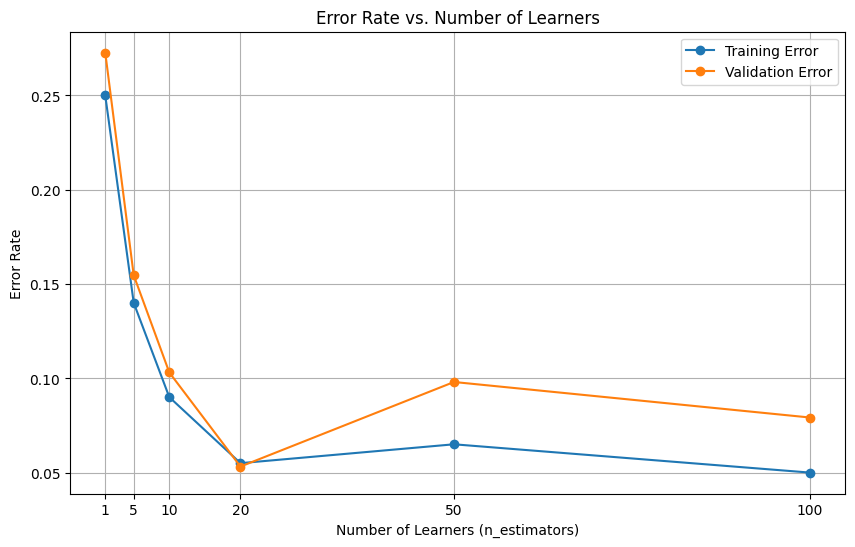

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=3)

# Define the number of learners (n_estimators)
n_estimators_values = [1, 5, 10, 20, 50, 100]

# Initialize lists to store error rates
train_errors = []
val_errors = []
# Train AdaBoost models with different numbers of learners
for n_estimators in n_estimators_values:
    # Initialize AdaBoost with the current number of learners
    ada_boost = AdaBoost(n_estimators=n_estimators, base_estimator=base_estimator)

    # Train the model
    ada_boost.fit(X_train, y_train)

    # Make predictions on training set
    y_pred = ada_boost.predict(X_test)

    # Calculate error rates
    train_error = 1 - accuracy_score(y_test, y_pred)
    val_error = 1 - precision_score(y_test, y_pred)

    # Append error rates to lists
    train_errors.append(train_error)
    val_errors.append(val_error)

# Plot the error rates for each number of learners
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_errors, marker='o', label='Training Error')
plt.plot(n_estimators_values, val_errors, marker='o', label='Validation Error')
plt.xlabel('Number of Learners (n_estimators)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Learners')
plt.xticks(n_estimators_values)
plt.legend()
plt.grid(True)
plt.show()


## 4. SVM (10 points)

Submit question 4 in the pdf file.

### Find the SVM formula (6 pts)

**Given** the following points find and draw the SVM formula (hyperplane formula):

| x1 | x2 | class|
|--------|----------|---------------|
|1|6|-|
|1	|10	|-
|4	|11	|-
|6	|1	|+
|7	|6	|+
|10	|4	|+

### Margin size (4 pts)

Based on the hyperplane, calculate the margin size.